In [2]:
import xtremes as xx
import xtremes.HigherOrderStatistics as hos

In [3]:
TS = hos.TimeSeries(n=1000, modelparams=(0.5,0.1,0.1))
TS.simulate(rep=200)
TS.get_blockmaxima(block_size=10)

In [4]:
PWM = hos.PWM_estimators(TS)
PWM.get_PWM_estimation()
PWM.get_statistics(gamma_true=0)
PWM.get_CIs()
PWM.statistics

{'gamma_mean': 0.47088517659996393,
 'gamma_variance': 0.01670944312254425,
 'gamma_bias': 0.472066822564784,
 'gamma_mse': 0.23955652808895547,
 'mu_mean': 3.1883509998758033,
 'mu_variance': 0.04162170110658726,
 'sigma_mean': 1.598521986577066,
 'sigma_variance': 0.05246458660618443,
 'gamma_CI': array([0.26048308, 0.7876679 ]),
 'mu_CI': array([2.85180707, 3.67041571]),
 'sigma_CI': array([1.24809831, 2.0891756 ])}

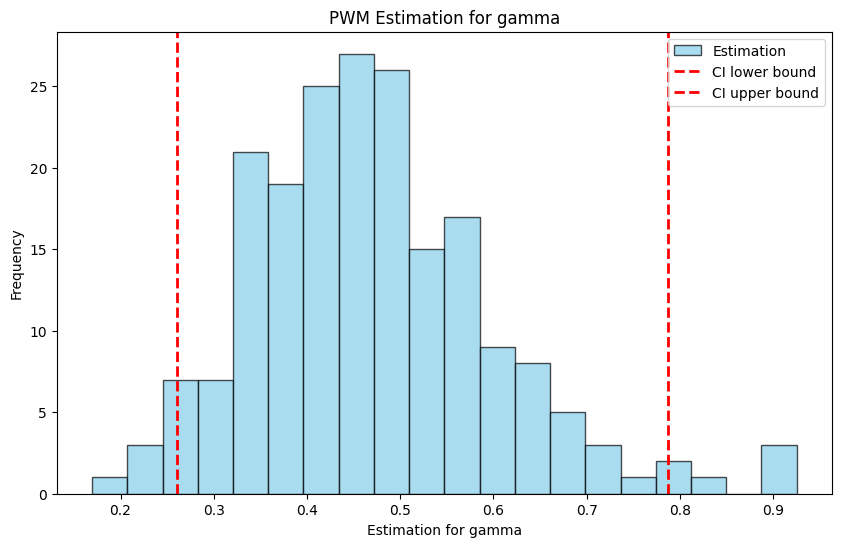

In [5]:
PWM.plot()

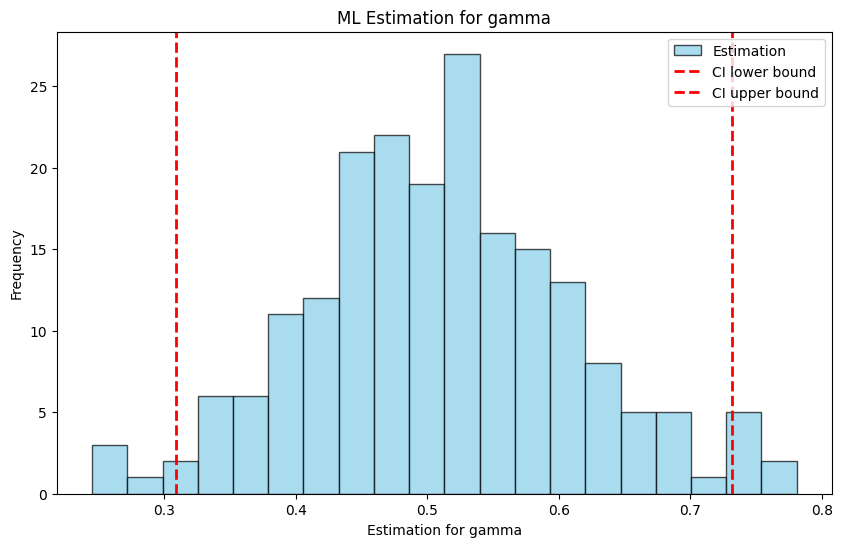

In [6]:
MLE = hos.ML_estimators(TS)
MLE.get_ML_estimation(PWM_estimators= PWM)
MLE.get_statistics(gamma_true=0)
MLE.get_CIs()  
MLE.plot()  

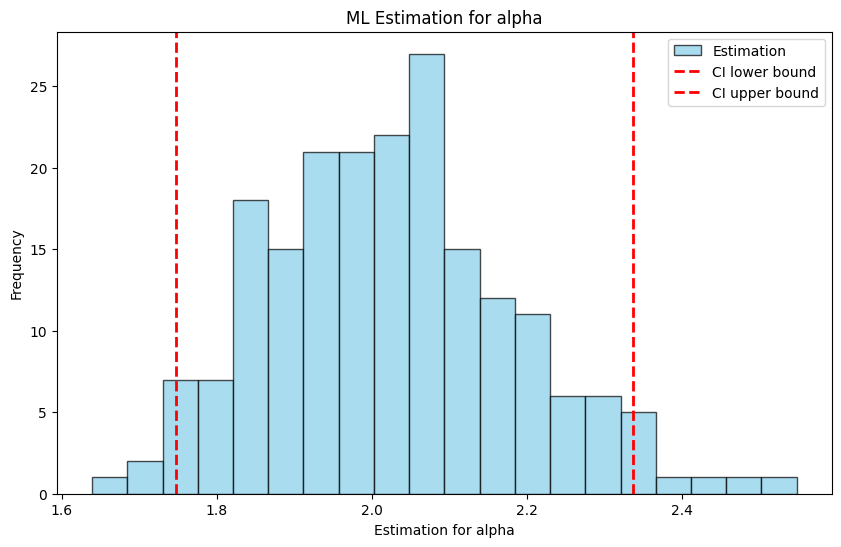

In [7]:
MLE = hos.Frechet_ML_estimators(TS)
MLE.get_ML_estimation(PWM_estimators= PWM)
MLE.get_statistics(alpha_true=0)
MLE.get_CIs()  
MLE.plot()  